In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [2]:
df=pd.read_csv('review_3_data.csv')

In [3]:
df=df[df.location=='India']

In [4]:
df.head()

,iso_code,continent,location,date,positive_rate,stringency_index,population,median_age,aged_65_older,aged_70_older,...,total_deaths_log,new_deaths_log,total_tests_log,new_tests_log,population_in_million_log,population_density_log,total_vaccinations_in_million,people_vaccinated_in_million,people_fully_vaccinated_in_million,new_vaccinations_in_million
73581,IND,Asia,India,2020-01-30,1.1998,10.19,1.393409e+09,28.2,5.989,3.414,...,4.634729,1.098612,8.779711,7.68156,7.240226,6.112396,0.805469,0.30977,0.290193,0.001925
73582,IND,Asia,India,2020-01-31,1.1998,10.19,1.393409e+09,28.2,5.989,3.414,...,4.634729,1.098612,8.779711,7.68156,7.240226,6.112396,0.805469,0.30977,0.290193,0.001925
73583,IND,Asia,India,2020-02-01,1.1998,10.19,1.393409e+09,28.2,5.989,3.414,...,4.634729,1.098612,8.779711,7.68156,7.240226,6.112396,0.805469,0.30977,0.290193,0.001925
73584,IND,Asia,India,2020-02-02,1.1998,10.19,1.393409e+09,28.2,5.989,3.414,...,4.634729,1.098612,8.779711,7.68156,7.240226,6.112396,0.805469,0.30977,0.290193,0.001925
73585,IND,Asia,India,2020-02-03,1.1998,10.19,1.393409e+09,28.2,5.989,3.414,...,4.634729,1.098612,8.779711,7.68156,7.240226,6.112396,0.805469,0.30977,0.290193,0.001925


In [5]:
from matplotlib.pyplot import figure
%matplotlib inline

In [6]:
# figure(figsize=(2560/200,1600/200), dpi=200)
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'positive_rate',
       'stringency_index', 'population', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'life_expectancy', 'human_development_index', 'new_cases_log',
       'total_cases_log', 'total_deaths_log', 'new_deaths_log',
       'total_tests_log', 'new_tests_log', 'population_in_million_log',
       'population_density_log', 'total_vaccinations_in_million',
       'people_vaccinated_in_million', 'people_fully_vaccinated_in_million',
       'new_vaccinations_in_million'],
      dtype='object')

In [7]:
df.drop(columns=['iso_code', 'continent', 'location', 'date'],axis=1,inplace=True)

In [8]:
X = df[df.columns[:-1]]
y = df['new_vaccinations_in_million']

In [9]:
from sklearn.model_selection import train_test_split
# model_selection is a class in sklearn

# test_size is for specifying what percentage of data should be used for testing
# similarly for train_size
# we just need to mention one of these, the other will include the remaining percentage of data
# random_state does simple random sampling (SRS) ?
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

# x_train includes the features and y_train includes the labels associated with those attributes
# similarly for x_test and y_test

In [10]:
X_train.shape

(559, 24)

In [11]:
X_train = np.array(X_train)
X_train.shape


(559, 24)

In [12]:
y_train = np.array(y_train).reshape(-1,1)
y_train.shape

(559, 1)

In [13]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)

/Users/anandsagar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


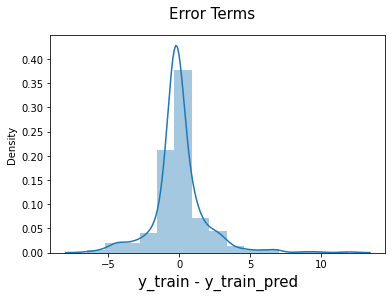

In [15]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [16]:
X_test = np.array(X_test)

# Predict the y values corresponding to X_test
y_pred = lr.predict(X_test)

In [17]:
X_test.shape

(240, 24)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.61585570517221

In [20]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7382891970391217

In [21]:
df.columns

Index(['positive_rate', 'stringency_index', 'population', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'life_expectancy', 'human_development_index',
       'new_cases_log', 'total_cases_log', 'total_deaths_log',
       'new_deaths_log', 'total_tests_log', 'new_tests_log',
       'population_in_million_log', 'population_density_log',
       'total_vaccinations_in_million', 'people_vaccinated_in_million',
       'people_fully_vaccinated_in_million', 'new_vaccinations_in_million'],
      dtype='object')

In [80]:
df_new=pd.read_csv('review_3_data.csv')

In [81]:
df_new=df_new[df_new.location=='Gambia']

/Users/anandsagar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


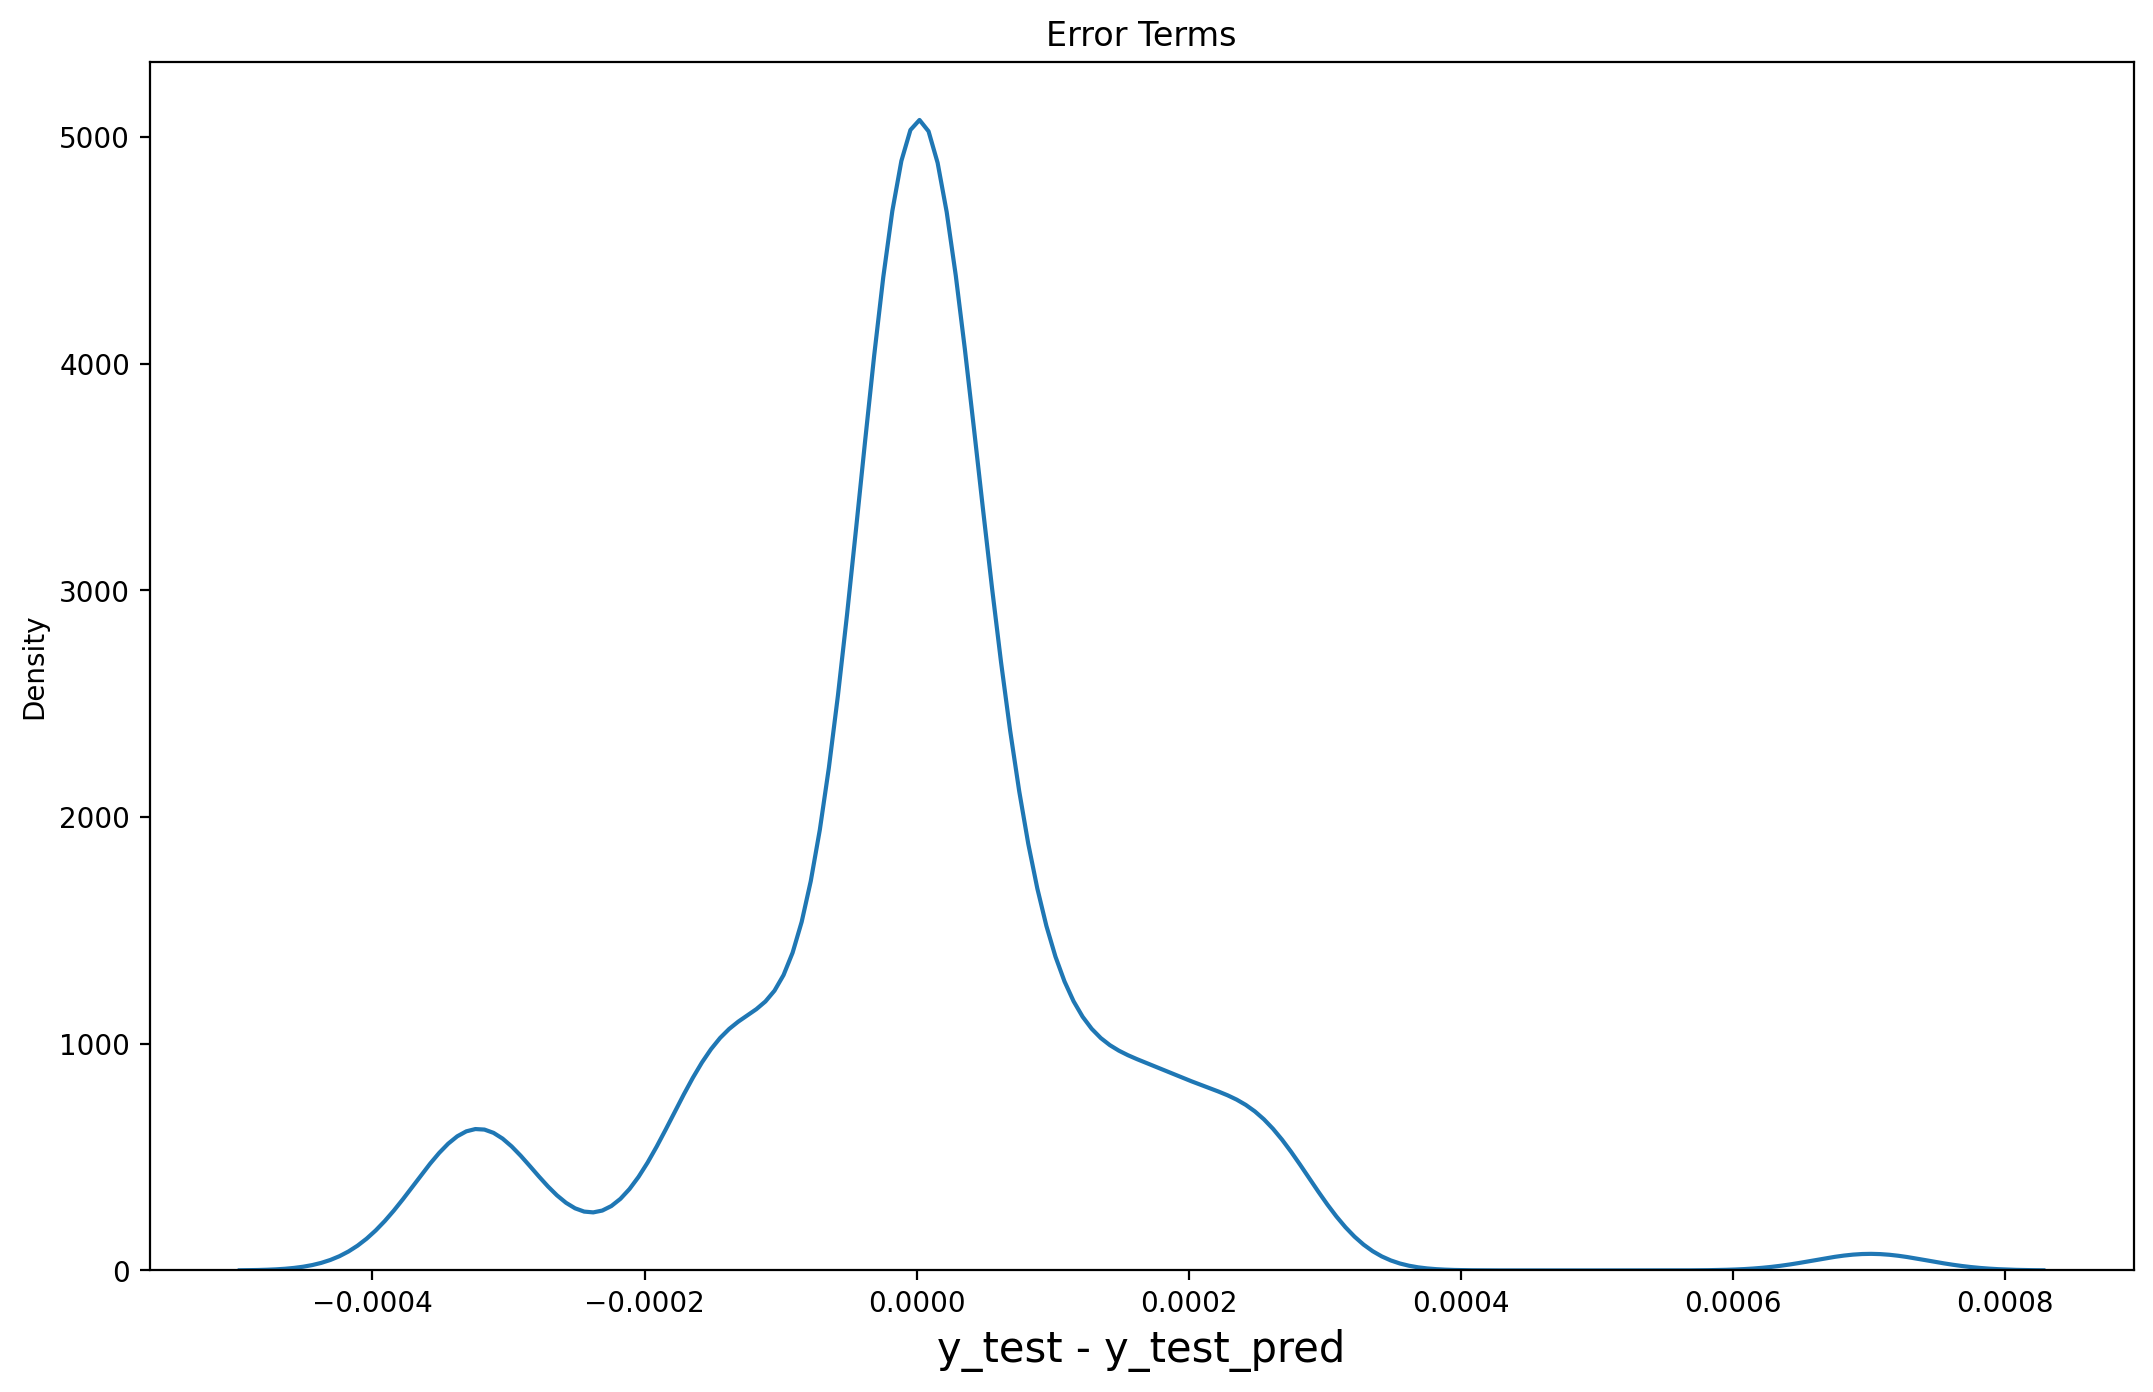

0.909313933600043


In [82]:
df_new.drop(columns=['iso_code', 'continent', 'location', 'date'],axis=1,inplace=True)
X = df_new[df.columns[:-1]]
y = df_new['new_vaccinations_in_million']

from sklearn.model_selection import train_test_split
# model_selection is a class in sklearn

# test_size is for specifying what percentage of data should be used for testing
# similarly for train_size
# we just need to mention one of these, the other will include the remaining percentage of data
# random_state does simple random sampling (SRS) ?
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

# x_train includes the features and y_train includes the labels associated with those attributes
# similarly for x_test and y_test

X_train = np.array(X_train)
X_train.shape

y_train = np.array(y_train).reshape(-1,1)
y_train.shape

from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)
figure(figsize=(2560/200,1600/200), dpi=200)
sns.distplot(res, bins = 15,hist=False)
plt.title("Error Terms")              # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.savefig("result.jpg")
plt.show()


X_test = np.array(X_test)

# Predict the y values corresponding to X_test
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred)
r_squared
print(r_squared)

In [56]:
from datetime import datetime

In [57]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")

In [58]:
dff=pd.read_csv('review_3_data.csv',parse_dates=['date'],date_parser=custom_date_parser)

In [60]:
df1=dff[dff.location=='Rwanda']

In [59]:
df2=dff[dff.location=='Gambia']

In [62]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'positive_rate',
       'stringency_index', 'population', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'life_expectancy', 'human_development_index', 'new_cases_log',
       'total_cases_log', 'total_deaths_log', 'new_deaths_log',
       'total_tests_log', 'new_tests_log', 'population_in_million_log',
       'population_density_log', 'total_vaccinations_in_million',
       'people_vaccinated_in_million', 'people_fully_vaccinated_in_million',
       'new_vaccinations_in_million'],
      dtype='object')

/Users/anandsagar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anandsagar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


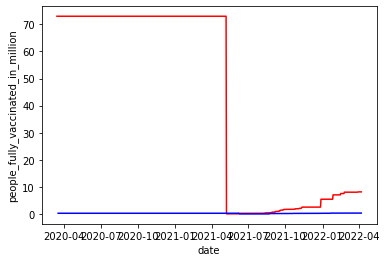

In [67]:
sns.lineplot('date','people_fully_vaccinated_in_million',data=df1,color='red')
sns.lineplot('date','people_fully_vaccinated_in_million',data=df2,color='blue')

In [84]:
df=pd.read_csv('review_3_data.csv')

In [87]:
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [88]:
df=df[df.continent=='Africa']

In [89]:
df

,iso_code,continent,location,date,positive_rate,stringency_index,population,median_age,aged_65_older,aged_70_older,...,total_deaths_log,new_deaths_log,total_tests_log,new_tests_log,population_in_million_log,population_density_log,total_vaccinations_in_million,people_vaccinated_in_million,people_fully_vaccinated_in_million,new_vaccinations_in_million
2332,DZA,Africa,Algeria,2020-02-25,1.1837,0.0,44616626.0,29.1,6.211,3.857,...,8.158516,1.098612,12.348240,7.113142,3.820272,2.909521,2.773475,1.282785,1.220014,0.002541
2333,DZA,Africa,Algeria,2020-02-26,1.1837,0.0,44616626.0,29.1,6.211,3.857,...,8.158516,1.098612,12.348240,7.113142,3.820272,2.909521,2.773475,1.282785,1.220014,0.002541
2334,DZA,Africa,Algeria,2020-02-27,1.1837,0.0,44616626.0,29.1,6.211,3.857,...,8.158516,1.098612,12.348240,7.113142,3.820272,2.909521,2.773475,1.282785,1.220014,0.002541
2335,DZA,Africa,Algeria,2020-02-28,1.1837,0.0,44616626.0,29.1,6.211,3.857,...,8.158516,1.098612,12.348240,7.113142,3.820272,2.909521,2.773475,1.282785,1.220014,0.002541
2336,DZA,Africa,Algeria,2020-02-29,1.1837,0.0,44616626.0,29.1,6.211,3.857,...,8.158516,1.098612,12.348240,7.113142,3.820272,2.909521,2.773475,1.282785,1.220014,0.002541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177138,ZWE,Africa,Zimbabwe,2022-04-03,1.0423,53.7,15092171.0,19.6,2.822,1.882,...,8.602820,0.000000,21.720912,8.488794,2.778333,3.778011,9.694465,5.517779,3.561400,0.093941
177139,ZWE,Africa,Zimbabwe,2022-04-04,1.0423,53.7,15092171.0,19.6,2.822,1.882,...,8.603738,1.791759,21.720912,8.488794,2.778333,3.778011,9.770202,5.562437,3.570255,0.075737
177140,ZWE,Africa,Zimbabwe,2022-04-05,1.0423,53.7,15092171.0,19.6,2.822,1.882,...,8.603738,0.000000,21.720912,8.488794,2.778333,3.778011,9.807529,5.589007,3.572995,0.037327
177141,ZWE,Africa,Zimbabwe,2022-04-06,1.0423,53.7,15092171.0,19.6,2.822,1.882,...,8.604105,1.098612,21.720912,8.488794,2.778333,3.778011,9.859654,5.615778,3.578170,0.052125


In [90]:
countries=df.location.unique()

In [106]:
countries=['Libya','Kenya','Namibia','Gambia','Ethiopia','Mali','Burundi','Rwanda']

In [107]:
gdp_countries={}

In [108]:
for country in countries:
    if country not in gdp_countries.keys():
        gdp_countries[country]=0

In [109]:
l=df.shape[0]

In [110]:
for i in range(l):
    all_data=dict(df.iloc[i])
    if all_data['location'] in gdp_countries.keys():
        gdp_countries[all_data['location']]=all_data['gdp_per_capita']

In [111]:
gdp_countries

{'Libya': 17881.509,
 'Kenya': 2993.028,
 'Namibia': 9541.808,
 'Gambia': 1561.767,
 'Ethiopia': 1729.927,
 'Mali': 2014.306,
 'Burundi': 702.225,
 'Rwanda': 1854.211}

In [113]:
gdp_countries=dict(sorted(gdp_countries.items(), key=lambda item: item[1]))

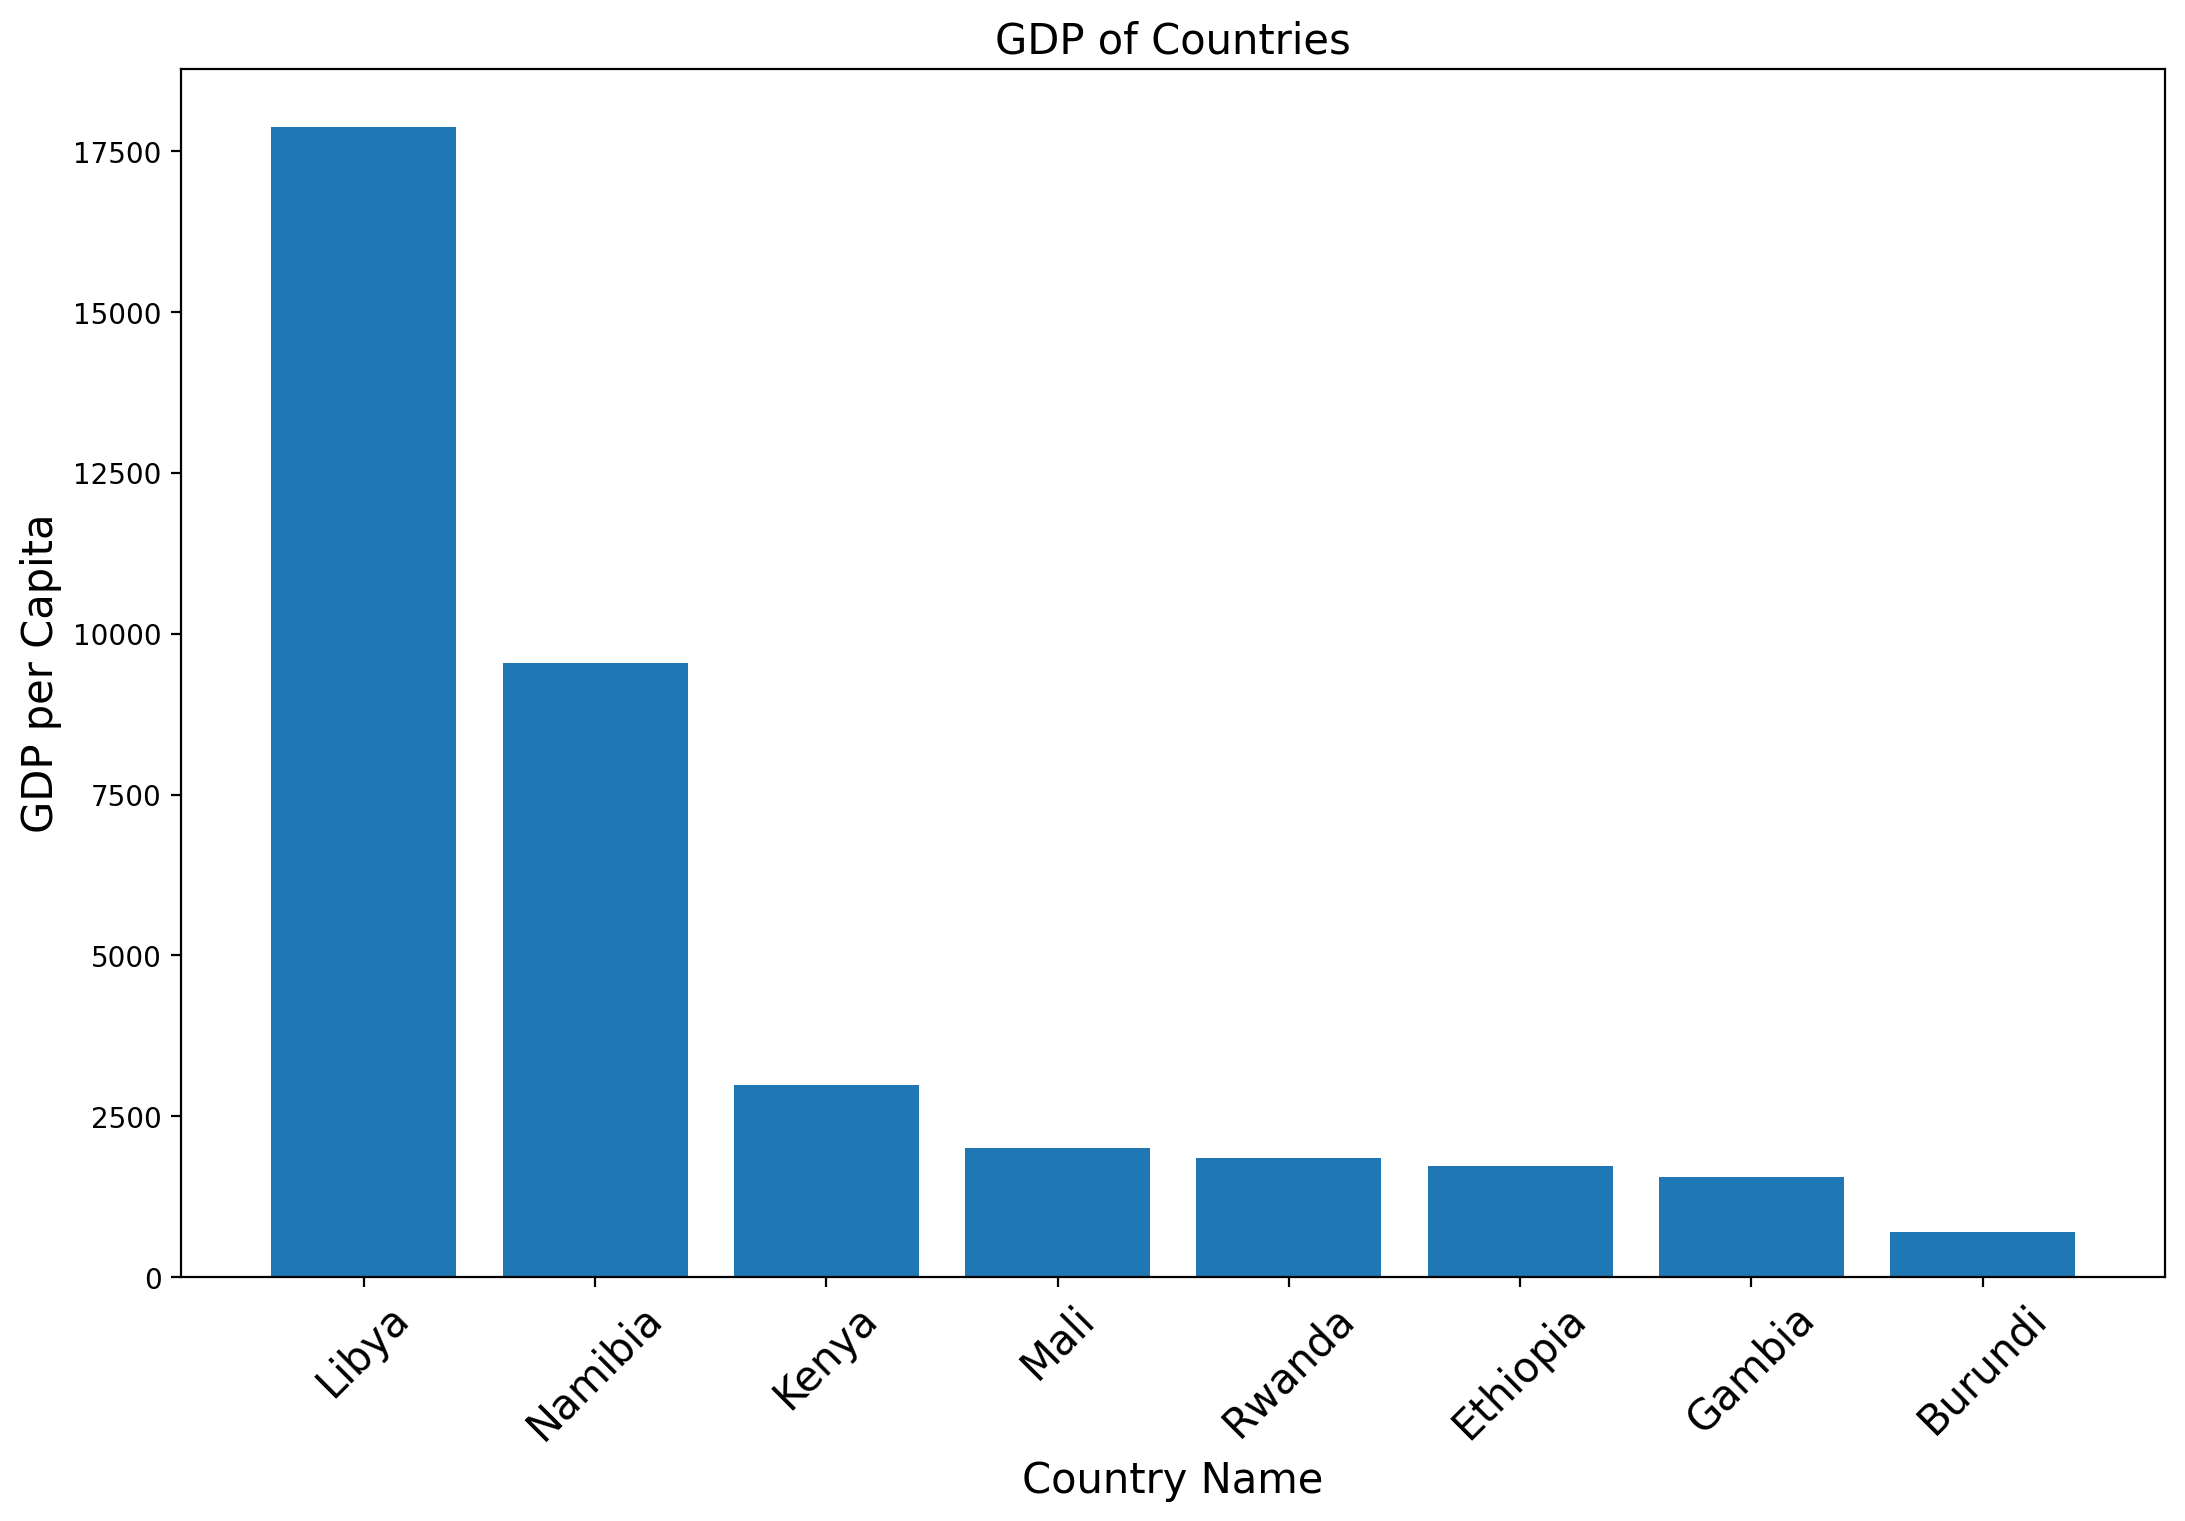

In [125]:
figure(figsize=(2560/200,1600/200), dpi=200)
plt.bar(list(gdp_countries.keys())[::-1],list(gdp_countries.values())[::-1])
plt.xlabel('Country Name',fontsize=15)
plt.ylabel('GDP per Capita',fontsize=15)
plt.title('GDP of Countries',fontsize=15)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('gdp_of_poor.jpg',bbox_inches='tight')